## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Data is in the form of IMAGES. 

It is comprised of images of road traffic signs particularly divided into 4 types of classes:-

• Traffic Light

• Stop Sign

• Speed Limit

• Crosswalk

These images contain some images that comprise of multiple classes, however these classes can be trained into the model once the base classes are being predicted correcttly. We will be using this form of on the go training to help improve the accuracy of prediction of our classes.

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

# Note

Our data consists of about 877 images divided across multiple classes some of which are present at the same time in a single image. To make sure that all of the classes in our dataset are highlighted we have chosen a set of certain images from the dataset that contain one or more than one of the classes in the image that we will train later.

# Why are we not using a sample of random images?

In this submission we would like to present as to how exactly we would be annotating the data ensuring the presence of a particular class in an image, so performing these actions on a particular set of images will allow us to show modifications on the same images as we go ahead with our data transformation and processing.

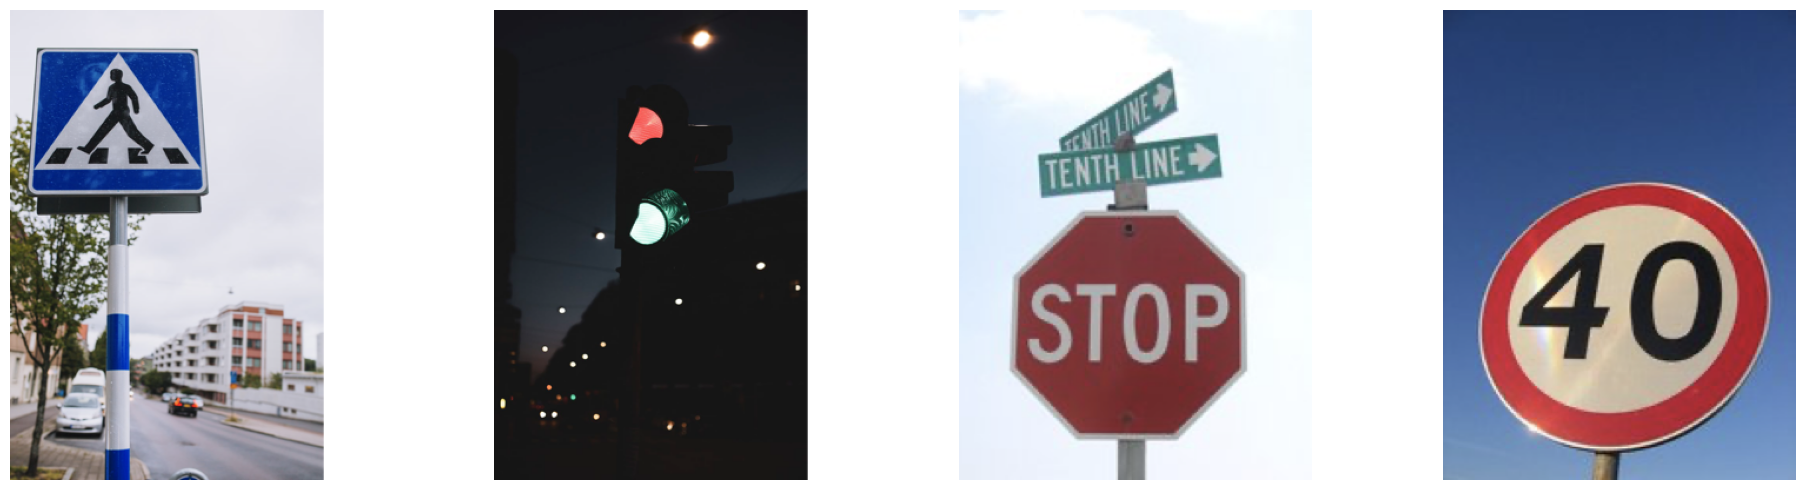

In [32]:
import os
from matplotlib import pyplot as plt
from PIL import Image

directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/sample_data'  

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off') 

plt.tight_layout()
plt.show()


Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

# Annotating our images

In this process we define regions of interest in every image so that model can go over those coordinates while training. The annotated images look as follows:

Tools used for annotation: LabelImg (https://github.com/HumanSignal/labelImg)
To give it a run: 
- pip3 install labelimg (install)
- labelimg (run)

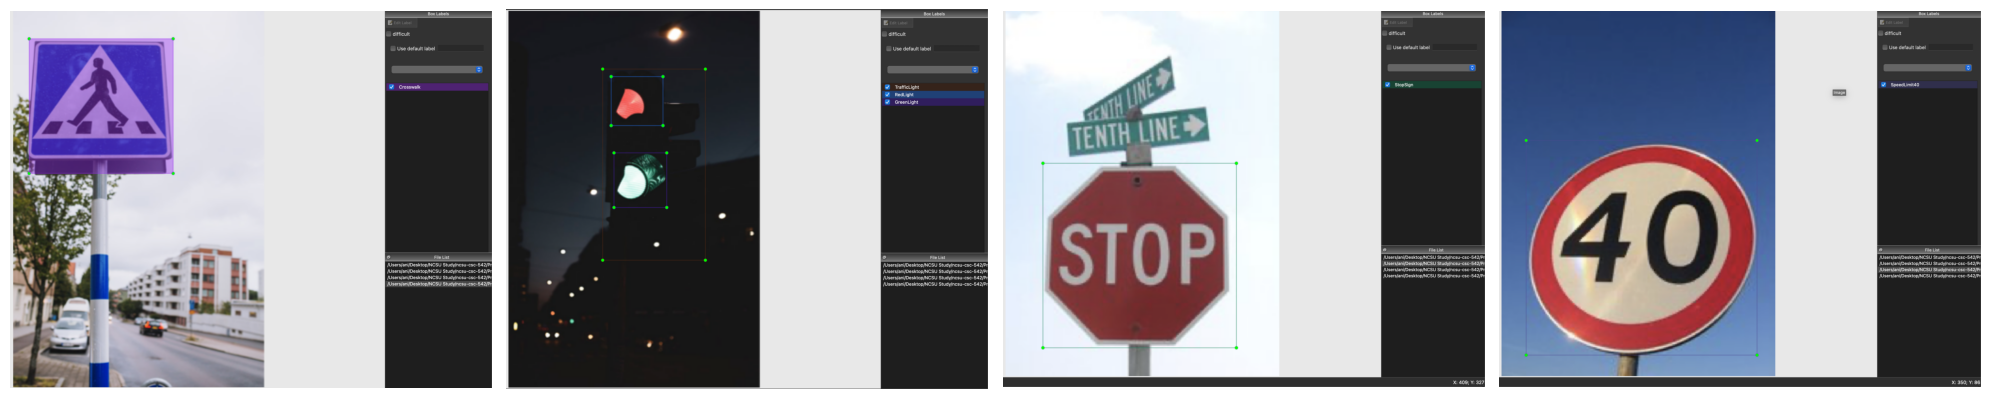

In [33]:
### YOUR CODE HERE
directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/annotated_images'  # Replace with your directory path

all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Adjust figure size as needed

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


In each of the images above, the region of interest or the CLASSES are annotated within the image. The classes defined are as follows:

In [34]:
file_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/sample_data_annotated/classes.txt'  

with open(file_path, 'r') as file:
    content = file.read()

print("Classes present in the Dataset:\n")
print(content)


Classes present in the Dataset:

TrafficLight
RedLight
GreenLight
StopSign
SpeedLimit40
Crosswalk



### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

# Region of Interest values, highlighting the presence of classes in our dataset. 

These annotations are stored in the form of .txt files which ar further read during training.

### Format of these Files

object-class, x-center, y-center, width, height (Essentially these coordinates form a bounded box around the region of interest in the image given)



In [35]:
### YOUR CODE HERE

import os

directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/dataset/sample_data_annotated'  

text_files = [f for f in os.listdir(directory_path) if f.endswith('.txt') and f != 'classes.txt']

for text_file in text_files:
    file_path = os.path.join(directory_path, text_file)
    
    with open(file_path, 'r') as file:
        content = file.read()
    
    print(f"{text_file}\n{content}")


image4.txt
5 0.346442 0.251250 0.573034 0.357500

image1.txt
0 0.574906 0.406250 0.408240 0.507500
1 0.507491 0.237500 0.205993 0.130000
2 0.520599 0.447500 0.209738 0.145000

image3.txt
4 0.511667 0.648750 0.843333 0.587500

image2.txt
3 0.490000 0.670000 0.706667 0.505000



### The annotations taken for differnt images within the dataset along with different classes in the dataset will be useful in training the model to provide accurate outputs for both image and real-time execution.

Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

Before, we display the outputs that we expect from our model, we would like to mention about the initial parameters that we would be using to train our data into the network. Please note these parameters are currently chosen just to reduce computing complexity as we are in the initial stages of the project and while they may seem invaluable currently we plan to fine-tune our model further to incorporate real-time testing using a high degree of hyperparameter tuning for our model.

### Configuration File training parameters (INITIALLY)

```
[net]
# Testing

batch=1
subdivisions=1

# Training
#batch=32
#subdivisions=2

width=416
height=416
channels=3

momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1
```

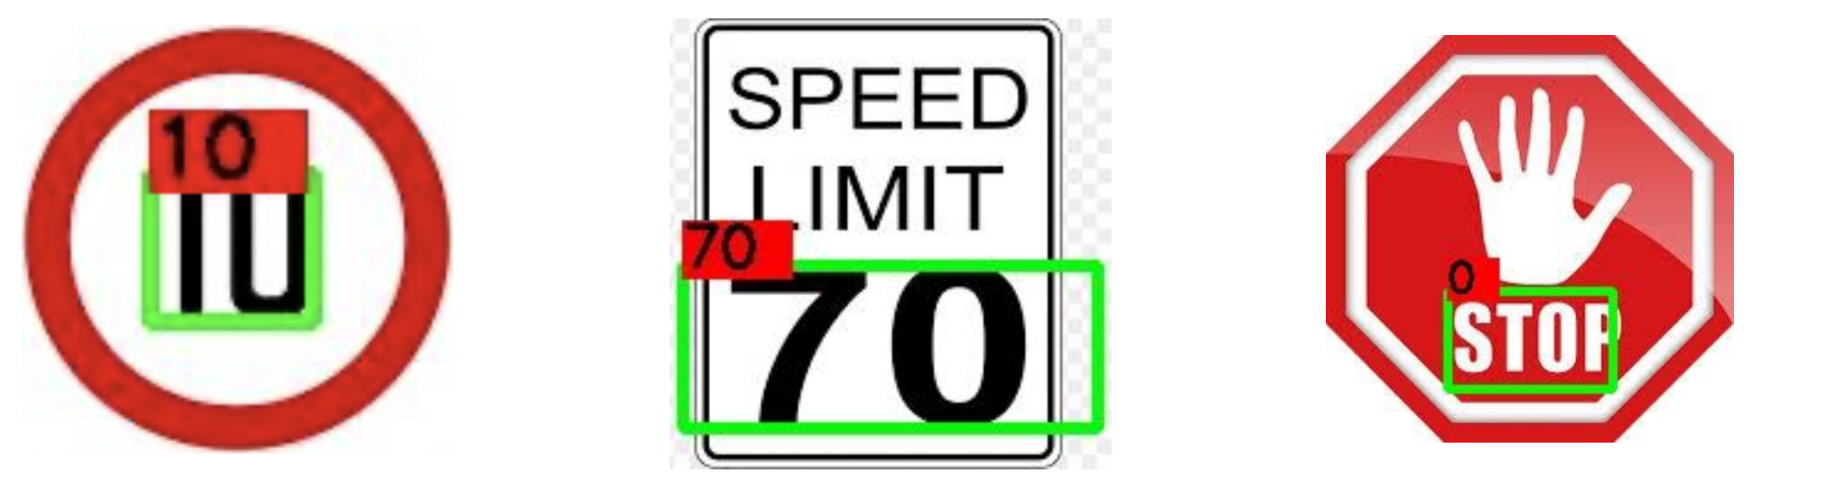

In [36]:
import os
from matplotlib import pyplot as plt
from PIL import Image

directory_path = '/Users/ani/Desktop/NCSU Study/ncsu-csc-542/Proj74/expected_outputs'
all_files = os.listdir(directory_path)

image_files = [file for file in all_files if file.endswith('.jpg') or file.endswith('.png')]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))  

for ax, image_file in zip(axes, image_files):
    img_path = os.path.join(directory_path, image_file)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  

plt.tight_layout()
plt.show()


### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

1. Over the top our data does seem like it is fairly balanced as there are good enough samples that can be used for both training and testing. These classes are the ones we have mentioned in the code-blocks above. Meaning, we have enough/adequate samples of a Traffic Light, Crosswalk, Stop Sign and Speed Limit. However, the issue comes in when we want to train the data even further adding more classes. For example, is the traffic light red, yellow or green? Is the speedlimit 10, 25, 70mph? When we consider all of these cases while also considering the cost on complexity when there are multiple classes in a single image, the data does seem like it could be a little unbalanced. While we cannot necessarily comment on how balanced it is at the beginning of training, we certainly have a solution that we definitely plan to use in case our results aren't close to what we expect.

Our solution is ```IMAGE AUGMENTATION```

Simple image processing algorithms and techniques should give us an extra edge while training this network and we hope to head in that direction once we have our data training in progress.

2. The data that we have considers outdoor environments in differnt lighting conditions which should make things a little difficult for the neural network challenging it to test its accuracy. The signs like a stop sign or a crosswalk will mostly look the same but the lighting conditions, the size of the image, and the angle at which the image is clicked or is displayed should definitely add to the variablity of the image dataset thus making the model and more importantly its outputs accurate.